# Table of Content
01. Import Libraries
02. Import Data
03. Hypothesis to be Tested
04. Data Preparation for Regression Analysis
05. Regression Analysis
06. Discussion

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Adjust setting to allow seeing all the rows in the output of this notebook
pd.options.display.max_rows = None

In [3]:
# Adjust setting to allow seeing all the columns in the output of this notebook
pd.options.display.max_columns = None

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

# 02. Import Data

In [5]:
# Define the main project folder path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 6 Advanced Analytics & Dashboard Design\11-2023 HDB Flat Resale Analysis'

In [6]:
# Import 'flat_resale_all_w_cpi (geodata).pkl' from 'Prepared Data' folder
flat_resale = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_explored (geodata).pkl'))

In [7]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price


In [8]:
flat_resale.shape

(915371, 26)

# 03. Hypothesis to be Tested

- <b>The larger the floor area, the higher the adjusted resale price. </b>

# 04. Data Preparation for Regression Analysis

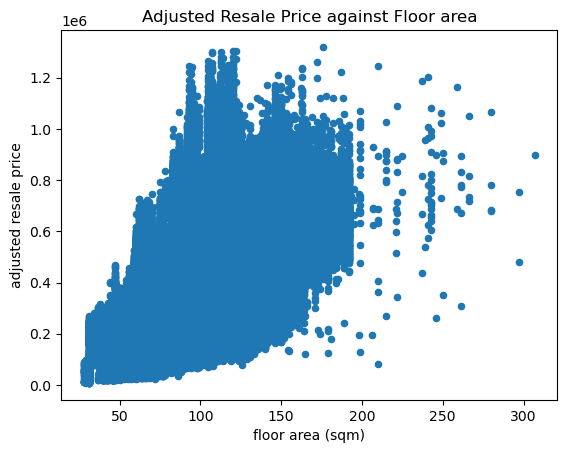

In [9]:
# 1. Create a scatterplot to revisit how the chosen variables of the hypothesis plot against each other. 

flat_resale.plot.scatter(x = 'floor_area_sqm', y = 'adjusted_resale_price') 
plt.title('Adjusted Resale Price against Floor area')  
plt.xlabel('floor area (sqm)')  
plt.ylabel('adjusted resale price')  
plt.show()

In [10]:
# 2. Reshape the variables into NumPy arrays and put them into separate objects.

X = flat_resale['floor_area_sqm'].values.reshape(-1,1)
y = flat_resale['adjusted_resale_price'].values.reshape(-1,1)

In [11]:
X

array([[ 31.],
       [ 31.],
       [ 31.],
       ...,
       [179.],
       [179.],
       [159.]])

In [12]:
y

array([[ 14516.12903226],
       [  9677.41935484],
       [ 12903.22580645],
       ...,
       [969479.35368043],
       [845620.12142238],
       [823063.38028169]])

In [13]:
# 3. Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# test_size = 0.3: the test set should comprise 30 percent of the data, thus making the training set 70 percent of the data.
# random_state = 0: If int, random_state is the seed used by the random number generator

# 05. Regression Analysis

In [14]:
# 1. Create a regression object.

regression = LinearRegression()

In [15]:
# 2. Fit the regression object onto the training set.
# By doing so, you’re training the model.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# 3. Predict the values of y by applying the model to X_test (test set).

y_predicted = regression.predict(X_test)

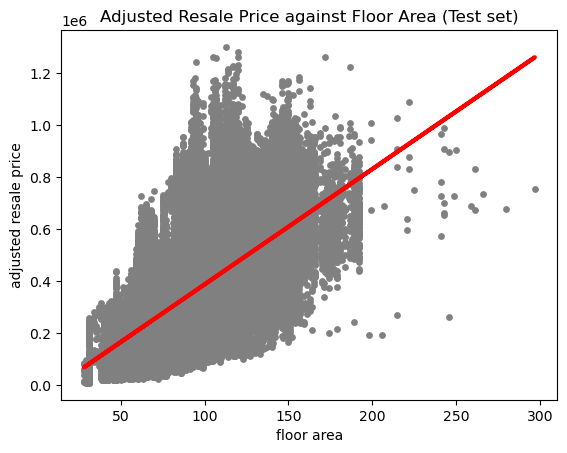

In [17]:
# 4. Create a plot that shows the regression line from the model on the test set.
# The model will use this regression line to predict y values.

plot_test = plt.scatter(X_test, y_test, color = 'gray', s = 15)
plt.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plt.title('Adjusted Resale Price against Floor Area (Test set)')
plt.xlabel('floor area')
plt.ylabel('adjusted resale price')
plt.show()

In [18]:
# Export 'plot_test'
plot_test.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_price_vs_floor_area (test set).png'), 
                         bbox_inches='tight')

<b><u>Interpretation: </u></b><br> 
The linear model represented by the red regression line doesn’t perfectly cover all of the data points. For example, in the area where the floor area is small (roughly between 90 to 120 sqm), there are still many data points that indicate high adjusted resale price.

In [19]:
# 5. Create objects that contain the model summary statistics.

mse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score (r-squared value). 

In [20]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:', regression.coef_)
print('Mean squared error: ', mse)
print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)

Slope: [[4432.23142867]]
Mean squared error:  13494620226.467787
Root mean squared error:  116166.34722012992
R2 score:  0.49180072292985433


<b>Interpretation:</b>
- Slope is 4432, which means as the floor area increases by 1 sqm, the adjusted resale price will increase \\$4432. 
- Root mean square error is $116166, which means the predicted adjusted resale price would have an average error of \\$116166 compared to the actual price. This is not so good. 
- R2 score is 0.49, which means 49 percent out of 100 percent of variation in adjusted resale price can be explained by the model. This is not very great as well. 

In [21]:
# 6. Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,57029.177719,73557.844484
1,534208.059981,494619.830207
2,141104.294479,348356.193061
3,398293.029872,485755.367350
4,292978.208232,405975.201634
5,162692.847125,246414.870202
6,243161.094225,246414.870202
7,251308.900524,241982.638773
8,543595.263724,432568.590206
9,379620.379620,405975.201634


<b>Interpretation:</b> There is quite a big difference between the actual and predicted y values (adjusted resale price). This shows that the regression model isn't doing a great job in explaining the relationship between the 'floor area' and 'adjusted resale price' variables. The relationship simply doesn't follow a single, straight regression line.

In [22]:
# 7. Compare how the regression fits the training set

# Predict y values in training set using our regression model
y_predicted_train = regression.predict(X_train)

In [23]:
mse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
# Print the model summary statistics to evaluate the performance of the model in training set itself.

print('Slope:', regression.coef_)
print('Mean squared error: ', mse)
print('Root mean squared error: ', np.sqrt(mse))
print('R2 score: ', r2)

Slope: [[4432.23142867]]
Mean squared error:  13494871180.87467
Root mean squared error:  116167.42736617124
R2 score:  0.4933179547047679


<b>Interpretation:</b> The model fits the training set very slightly better than the test set (R2 score: training 0.4933 vs test 0.4918). This means the model is not overfit at all. However, it also confirms that the relationship you’re exploring isn’t purely linear.
In terms of RMSE, the model performs slightly better in the test set than the training set (RMSE: training \\$116167 vs test \\$116116). 

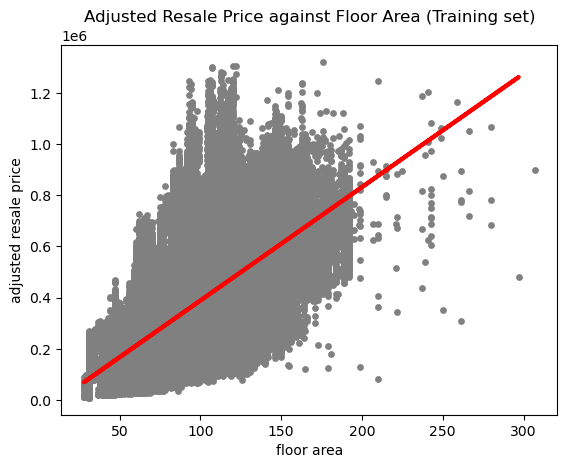

In [25]:
# Visualizing the training set results.

plot_train = plt.scatter(X_train, y_train, color = 'gray', s = 15)
plt.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plt.title('Adjusted Resale Price against Floor Area (Training set)')
plt.xlabel('floor area')
plt.ylabel('adjusted resale price')
plt.show()

In [26]:
# Export 'plot_train'
plot_train.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_price_vs_floor_area (training set).png'), 
                         bbox_inches='tight')

<b>Interpretation:</b> The plot has not much difference from the test set. 

# 05. Discussion

From the positive slope value 4432 and the visualization, we can see that the hypothesis is generally correct, where the larger the floor area, the higher the adjusted resale price. 

However, this statement is only partially true. From the RMSE value of \\$116116 and R2 score of 0.49, we know that the regression model is not good enough to make an accurate prediction. There’s still a lot of variance in the data that can’t be explained by the linear relationship between the variables. 

Therefore, floor area alone is not a perfect predictor for adjusted resale price. Perhaps, other variable(s) might be needed to make a better prediction for adjusted resale price. Multiple regression model would be needed for analysis with more than one predictor. 